# **SC2001: Lab 3**

###**Group Members:**
- Bui Dang Nguyen
- Toh Kok Soon
- Ammamalai Ramesh Santhosh Kumar
- Bose Samrath

## Recursive Definition

### Problem Definition
We're given
- $n$ items
- Each item $i$ has a weight $w_i$ and a profit of $p_i$
- The knapsack has a maximum capacity of $C$
- We can take unlimited copies of the item.

Goal: We're trying to maximise the total profit without exceeding the capacity.

---

### Identifying the possible decisions

If Capacity $C \leq 0$, (Base Case):
- We cannot take any items:
$$P(C) = 0\quad   (\text{if }\; C \leq 0) $$

At any capacity $C$, we can make a decision:
- For each item $i$, that fits $(w_i \leq C)$:
  - Include at least one instance of item $i$.
  - If item $i$ is included once, we gain profit $p_i$ from it, and now we have $C-w_i$ capacity left to fill and we can fill that optimally again.


So the total profit if we pick item $i$ is:
$$(p_i + P(C - w_i))$$

---

### Altogether

Combine everything to get the recursive formula:

$$
P(C) =
\begin{cases}
0, & \text{if } C \le 0 \\[8pt]
\displaystyle \max_{i:\, w_i \le C} \bigl(p_i + P(C - w_i)\bigr), & \text{if } C > 0
\end{cases}$$









## Subproblem Graph

We stop when capacity reaches 0 or when the capacity is lower than the minimum weight, in the following cases: P(0) and P(2)

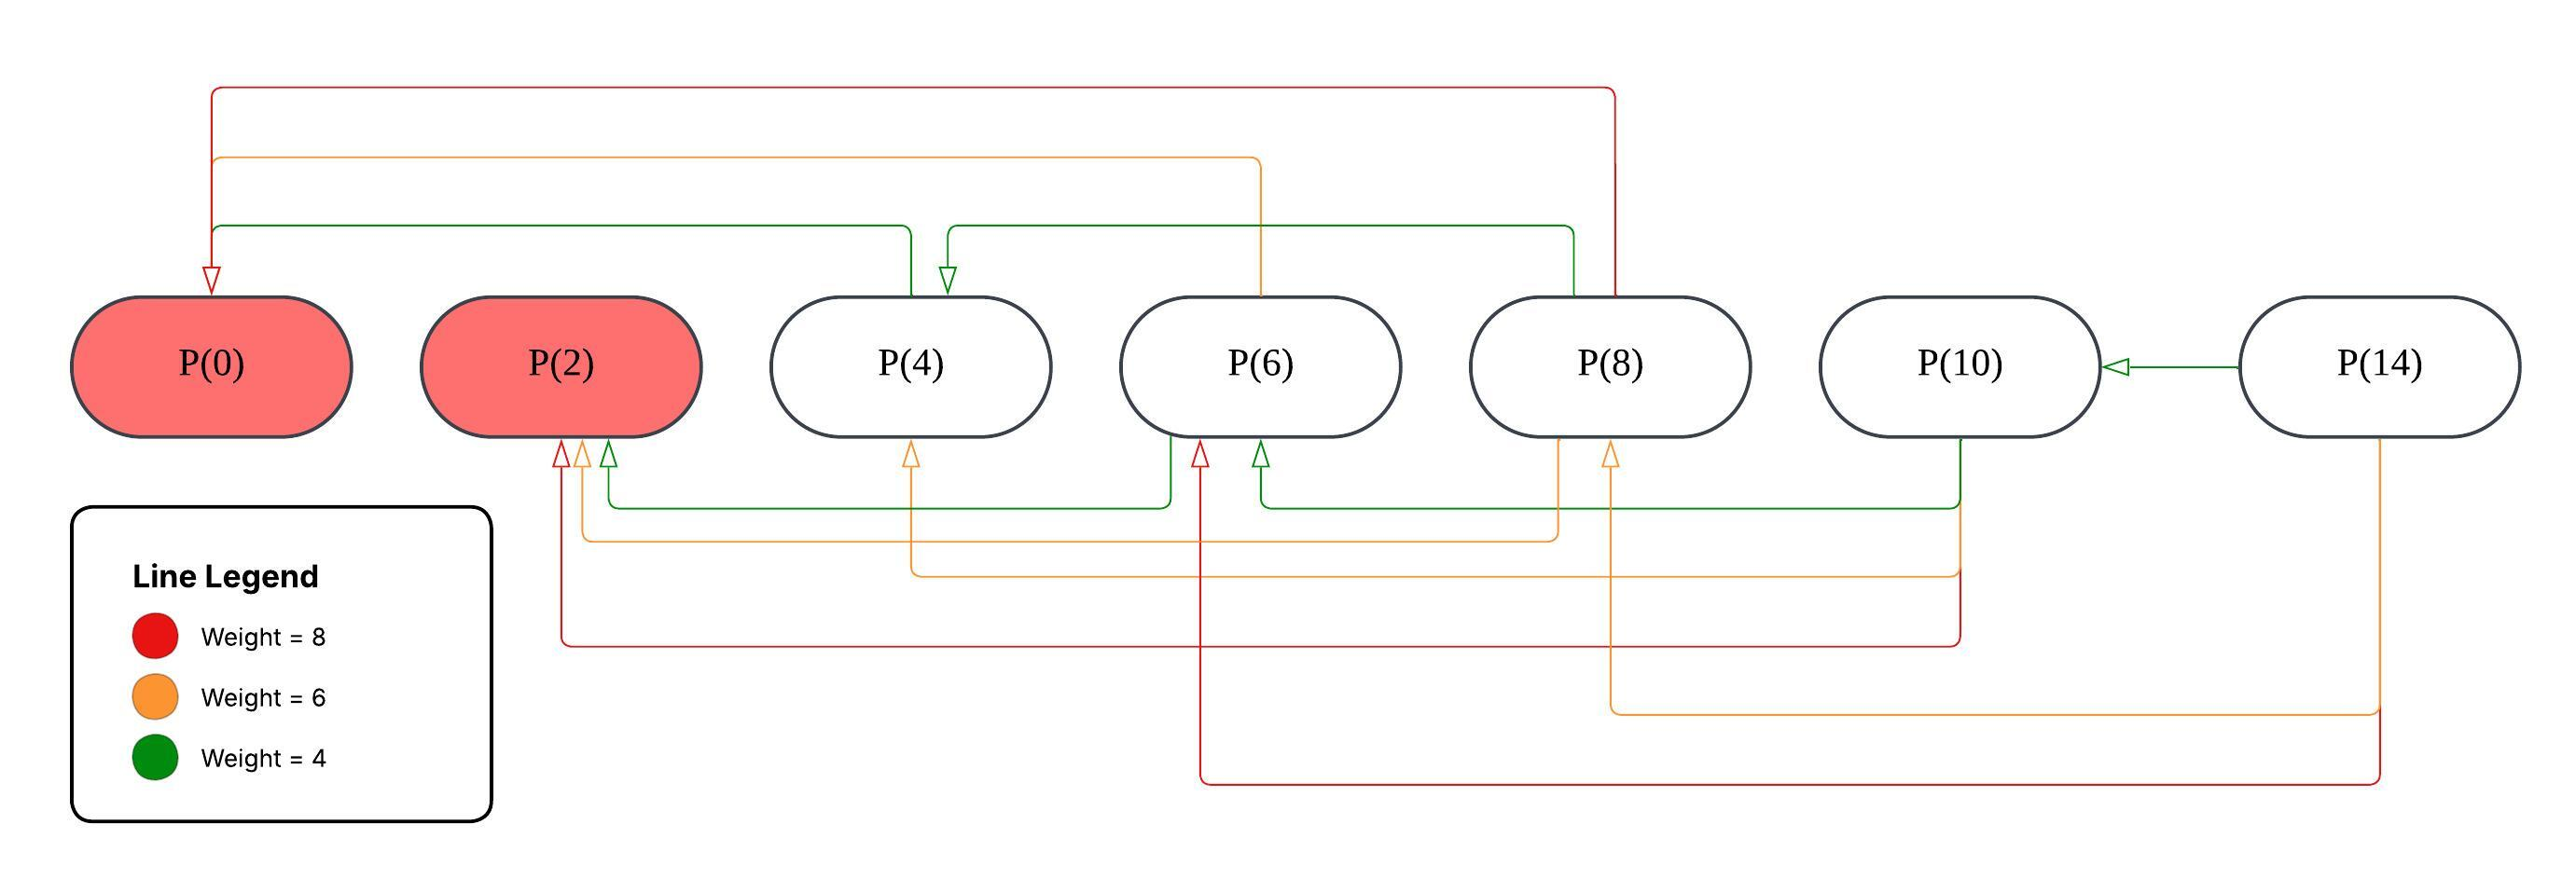

## Bottom-up Dynamic Programming

In [ ]:
def knapsack(C, weights, profits):
  dp = [0] * (C + 1)
  for c in range(1, C + 1):
    for w, p in zip(weights, profits):
      if w <= c:
        dp[c] = max(dp[c], dp[c - w] + p)
  return dp[C]

if __name__ == "__main__":
    cases = [
        (14, [4, 6, 8], [7, 6, 9]),
        (14, [5, 6, 8], [7, 6, 9]),
        (50, [4, 5, 6], [7, 6, 9])
    ]
    for i, (C, w, p) in enumerate(cases, 1):
        print(f"Case {i}: C = {C}, weights = {w}, profits = {p}")
        print(f"Result: {knapsack(C, w, p)}")

Case 1: C = 14, weights = [4, 6, 8], profits = [7, 6, 9]
Result: 21
Case 2: C = 14, weights = [5, 6, 8], profits = [7, 6, 9]
Result: 16
Case 3: C = 50, weights = [4, 5, 6], profits = [7, 6, 9]
Result: 86


This dynamic-programming algorithm finds the maximum profit for a knapsack
that can include **unlimited copies** of each item.

1. Create an array `dp` of size `C + 1`, where `dp[c]` represents the best profit achievable for capacity `c`.

2. Initialize all values to 0, since a knapsack of capacity 0 yields zero profit.

3. For each capacity `c` from 1 to `C`:
   - For every item `(w, p)`:
   
     If the item fit $( w \le c )$, update:

$$
dp[c] = \max(dp[c], ~dp[c - w] + p).
$$

   - This relation ensures smaller subproblems are reused,
     building up to larger capacities.

4. After filling the array, `dp[C]` holds the **maximum profit** achievable.

**Complexity:**  
- Time = $O(C \cdot n)$  
- Space = $O(C)$

This method is efficient, concise, and ideal when we only need
the maximum profit (not the exact combination of items).

## Bonus

**TLDR: This section gives an $O(n \cdot M^2)$ solution for the unbounded knapsack problem on integer weights, where $M$ is the maximum weight.**

In the case where $C$ (the maximum capacity of the knapsack) is very large, intuition tells us to stuff it with the item that seems the most cost-efficient (that is, having the highest profit over weight ratio). But how correct is this?

Turns out, very! In fact, let $M$ be the maximum weight of an item. It can be proven that we can stuff the knapsack as stated above until the remaining capacity is $O(M^2)$.

### Theorem
Assume that items are numbered from $1$ to $n$.

Let $j$ be the item that has the highest profit over weight ratio (that is, $\frac{p_j}{w_j}$ is the highest of all items).

Let the knapsack capacity be $C > w_j^2$, and $M$ be the maximum weight of any item.

We prove that there exists an optimal solution for this instance of unbounded knapsack that contains less than $w_j$ non-$j$ items.

### Proof

Let $S$ be an optimal multiset of items for capacity $C$, chosen in a way that the number of non-$j$ items in $S$ is the minimum out of all optimal solutions.

Suppose the number of non-$j$ items in $S$ is $k \ge w_j$. We will derive a contradiction by proving that there's still a way to replace some of these items with copies of item $j$.

Write out the list of weights of all non-$j$ items in $S$ in arbitrary order as
\begin{equation}
a_1, a_2, \ldots, a_k,
\end{equation}
where $1 \le a_i \le M$ for all $1 \le i \le k$.

Consider the values
\begin{align}
&r_1 = (a_1) \bmod w_j \\
&r_2 = (a_1 + a_2) \bmod w_j \\
&\cdots \\
&r_k = (a_1 + a_2 + \cdots + a_k) \bmod w_j
\end{align}

Because $k \ge w_j$, either
- some $r_i = 0$, which means $a_1, a_2, \ldots, a_i$ sum to a multiple of $w_j$, or
- there exists some $u < v$ such that $r_u = r_v$ (pigeonhole principle on $w_j - 1$ possible values), which means $a_{u + 1}, \ldots, a_v$ sum to a multiple of $w_j$.

Either case, there exists some nonempty subset $T$ of $S$ whose weights sum to $t \cdot w_j$, where $t$ is an integer $\ge 1$.

Because $j$ has the highest profit-to-weight ratio, for items in $T$, we have
\begin{equation}
\sum_{i \in T} p_i = \sum_{i \in T} w_i \cdot \frac{p_i}{w_i} \le \sum_{i \in T} w_i \cdot \frac{p_j}{w_j} = t \cdot p_j.
\end{equation}
Thus, we can replace $T$ with $t$ copies of item $j$, maintaining the same total weight while achieving at least the same total profit:
- If the replacement strictly increases the total profit, that contradicts the optimality of $S$.
- If the replacement keeps the total profit the same, that contradicts the minimality of non-$j$ items of $S$.

Either case, we reach a contradiction.

Therefore, our assumption is false, so there exists an optimal solution with less than $w_j$ non-$j$ items.

### Application
From the theorem, we know that there exists a solution whose total weight of non-$j$ items is no more than $(w_j - 1) \cdot M$.

We can apply this fact to create a $O(n \cdot M^2)$ solution as follows:
- Step 1: Find the optimal item $j$. If there are multiple, select the one with the smallest weight.
- Step 2: Let $k = \max (0, \lceil \frac{C - (w_j - 1) \cdot M}{w_j} \rceil)$. Fill the knapsack with $k$ copies of item $j$, and simultaneously decrease capacity $C$ by $k \cdot w_j$.
- Step 3: Use the bottom-up DP we discussed earlier on the remaining capacity, which is now $\le M^2$.

The complexity of this algorithm is $O(n \cdot (w_j - 1) \cdot M) = O(n \cdot M^2)$.

This is also sometimes written as $O(M ^ 3)$ when $n = O(M)$ (there exists an item for basically every weight from $1$ to $M$).

With little adjustments, the same idea can also be used for an $O(n \cdot V^2)$ algorithm, where $V$ is the maximum profit of any item.

### Implementation

In [ ]:
def knapsack_2(C, weights, profits):
  best_p, best_w = profits[0], weights[0]
  for w, p in zip(weights, profits):
    if p * best_w > best_p * w:
      best_w, best_p = w, p
    elif p * best_w == best_p * w and w < best_w:
      best_w, best_p = w, p

  M = max(weights)
  k = max(0, (C - (best_w - 1) * M) // best_w)

  C -= k * best_w

  return knapsack(C, weights, profits) + k * best_p

In [ ]:
if __name__ == "__main__":
    cases = [
        (14, [4, 6, 8], [7, 6, 9]),
        (14, [5, 6, 8], [7, 6, 9]),
        (50, [4, 5, 6], [7, 6, 9]),
        (97, [16, 19, 12, 3, 5], [8, 12, 4, 16, 26])
    ]
    for i, (C, w, p) in enumerate(cases, 1):
        print(f"Case {i}: C = {C}, weights = {w}, profits = {p}")
        print(f"Solution 1: {knapsack(C, w, p)}")
        print(f"Solution 2: {knapsack_2(C, w, p)}")

Case 1: C = 14, weights = [4, 6, 8], profits = [7, 6, 9]
Solution 1: 21
Solution 2: 21
Case 2: C = 14, weights = [5, 6, 8], profits = [7, 6, 9]
Solution 1: 16
Solution 2: 16
Case 3: C = 50, weights = [4, 5, 6], profits = [7, 6, 9]
Solution 1: 86
Solution 2: 86
Case 4: C = 97, weights = [16, 19, 12, 3, 5], profits = [8, 12, 4, 16, 26]
Solution 1: 516
Solution 2: 516
